<a href="https://colab.research.google.com/github/ammar01-me/Brain_MRI_prediction/blob/main/MRI_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required liabrary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

imorting the data form kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arwabasal/brain-tumor-mri-detection")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'brain-tumor-mri-detection' dataset.
Path to dataset files: /kaggle/input/brain-tumor-mri-detection


converting the data into  tensorflow datasets

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing import image_dataset_from_directory

In [ ]:
import os
import cv2

In [ ]:
train_dir = path + '/brain_tumor_dataset'

test_dir_yes = path + '/yes'
test_dir_no = path + '/no'

In [ ]:
height = 256
width = 256

In [ ]:
train_data  = image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(height,width),
    color_mode='grayscale'
)

Found 253 files belonging to 2 classes.


In [ ]:
# Assuming 'path' and image dimensions (height, width) are already defined
def load_images_from_directory(directory, label, image_size=(256, 256)):
    images = []
    labels = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            img = cv2.imread(filepath)
            img = cv2.resize(img, image_size, interpolation=cv2.INTER_AREA)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Could not read image {filepath}: {e}")
    return np.array(images), np.array(labels)

# Load test data with labels
test_images_yes, test_labels_yes = load_images_from_directory(test_dir_yes, 1, (height, width))
test_images_no, test_labels_no = load_images_from_directory(test_dir_no, 0, (height, width))

# Concatenate and shuffle the test data
test_images = np.concatenate((test_images_yes, test_images_no), axis=0)
test_labels = np.concatenate((test_labels_yes, test_labels_no), axis=0)

# Shuffle the data
shuffle_indices = np.arange(len(test_images))
np.random.shuffle(shuffle_indices)
test_images = test_images[shuffle_indices]
test_labels = test_labels[shuffle_indices]

print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Create a TensorFlow dataset from the numpy arrays
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Optional: batch the dataset
test_data = test_data.batch(32)

# Optional: prefetch for performance
test_data = test_data.prefetch(buffer_size=tf.data.AUTOTUNE)

print("Combined test dataset:", test_data)

Test images shape: (253, 256, 256)
Test labels shape: (253,)
Combined test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
class_name = train_data.class_names
print(class_name)

['no', 'yes']


In [ ]:
for img,lab in test_data.take(1):
  print(img[0].shape)
  print(lab[0].numpy())

(256, 256)
1


In [ ]:
len(test_data)
print(8*32)

256


In [ ]:
for images, labels in test_data.take(1):
    # To see only labels
    print("Labels for the first batch:")
    print(labels.numpy())

    # To see only image data (printing shape and dtype as images are large)
    print("\nImage data for the first batch (shape and dtype):")
    print(images.shape, images.dtype)

    # To see the actual image data for the first image in the batch (optional, can be very large)
    # print("\nFirst image data (first few pixels):")
    # print(images.numpy()[0, :10, :10, :])

Labels for the first batch:
[1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0]

Image data for the first batch (shape and dtype):
(32, 256, 256) <dtype: 'uint8'>


In [ ]:
for image,label in test_data.take(1):
  # print(image.numpy())
  print(label)

tf.Tensor([1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0], shape=(32,), dtype=int64)


#Doing the same thing in diffrant order

In [ ]:
import os
import cv2

In [ ]:
# to get data dirtecotry
DATA_DIR = train_dir
classes = [folder for folder in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, folder))]
print('Available classes: ', classes)

Available classes:  ['no', 'yes']


In [ ]:
#loading the data
data = []
for cls in classes:
    class_path = os.path.join(DATA_DIR, cls)
    for filename in os.listdir(class_path):
        filepath = os.path.join(class_path, filename)
        data.append({'filepath': filepath, 'label': cls})

df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)

print("First 5 rows of the DataFrame:")
display(df.head())
print("\n\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:


,filepath,label
0,/kaggle/input/brain-tumor-mri-detection/brain_...,no
1,/kaggle/input/brain-tumor-mri-detection/brain_...,no
2,/kaggle/input/brain-tumor-mri-detection/brain_...,yes
3,/kaggle/input/brain-tumor-mri-detection/brain_...,yes
4,/kaggle/input/brain-tumor-mri-detection/brain_...,yes




DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  253 non-null    object
 1   label     253 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


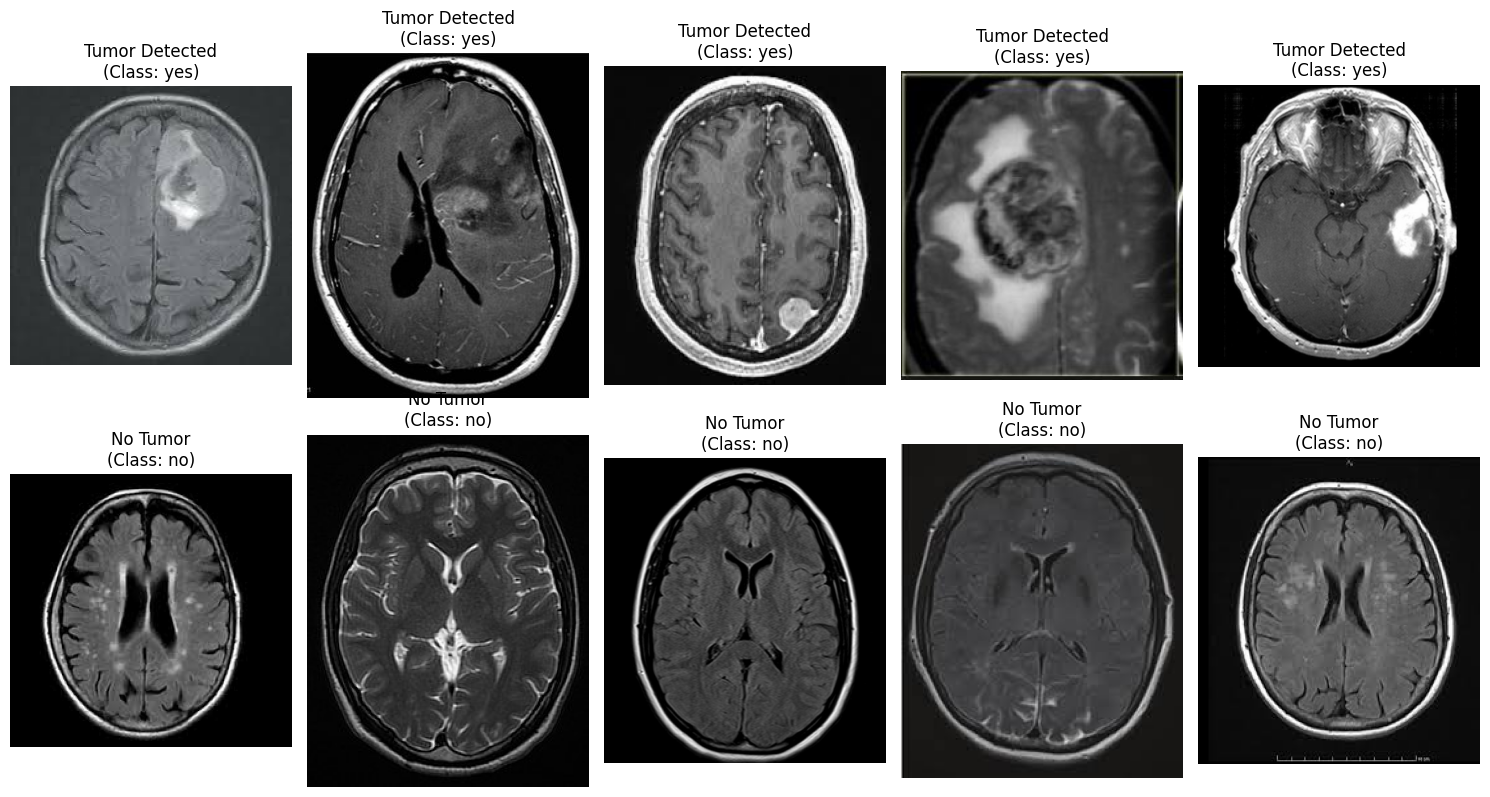

In [ ]:
#image showcase
plt.figure(figsize=(15, 8))
n_samples = 5
yes_samples = df[df['label'] == 'yes'].sample(n_samples)

for i, row in enumerate(yes_samples.iterrows()):
    filepath = row[1]['filepath']
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(img)
    plt.title(f"Tumor Detected\n(Class: yes)")
    plt.axis('off')


no_samples = df[df['label'] == 'no'].sample(n_samples)
for i, row in enumerate(no_samples.iterrows()):
    filepath = row[1]['filepath']
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(img)
    plt.title(f"No Tumor\n(Class: no)")
    plt.axis('off')

plt.tight_layout()
plt.show()


Statistics for image dimensions:


,height,width
count,253.000000,253.000000
mean,386.019763,354.237154
std,213.128463,217.111684
min,168.000000,150.000000
25%,248.000000,225.000000
50%,331.000000,278.000000
75%,442.000000,400.000000
max,1427.000000,1920.000000


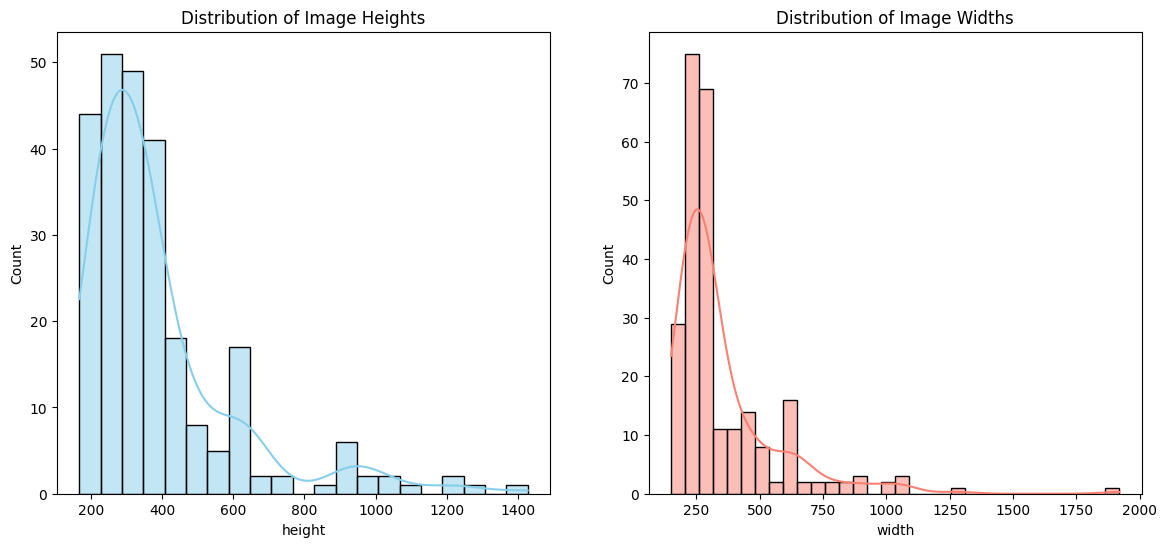

In [ ]:
#getting the image height and width data
heights = []
widths = []

for filepath in df['filepath']:
    try:
        img = cv2.imread(filepath)
        h, w, _ = img.shape
        heights.append(h)
        widths.append(w)
    except Exception as e:
        print(f"Could not read {filepath}: {e}")

df['height'] = heights
df['width'] = widths

print("\nStatistics for image dimensions:")
display(df[['height', 'width']].describe())

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['height'], kde=True, color='skyblue').set_title('Distribution of Image Heights')
plt.subplot(1, 2, 2)
sns.histplot(df['width'], kde=True, color='salmon').set_title('Distribution of Image Widths')
plt.show()

In [ ]:
train_data = train_data.map(lambda x,y: (x/255,y))
test_data = test_data.map(lambda x,y: (x/255,y))

Making the model

In [ ]:
cnn = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(256,256,1)),
    MaxPooling2D((2,2),padding='same',),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2),padding='same'),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
    ])

In [ ]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = cnn.fit(train_data,epochs=8,validation_data=test_data)

Epoch 1/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.5268 - loss: 0.7532 - val_accuracy: 0.7905 - val_loss: 0.5760
Epoch 2/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7678 - loss: 0.5437 - val_accuracy: 0.8142 - val_loss: 0.4736
Epoch 3/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8377 - loss: 0.4539 - val_accuracy: 0.8379 - val_loss: 0.4065
Epoch 4/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8480 - loss: 0.3925 - val_accuracy: 0.8577 - val_loss: 0.3355
Epoch 5/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8667 - loss: 0.3204 - val_accuracy: 0.9209 - val_loss: 0.2781
Epoch 6/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9170 - loss: 0.2862 - val_accuracy: 0.9130 - val_loss: 0.2210
Epoch 7/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9185 - loss: 0.1942 - val_accuracy: 0.9486 - val_loss: 0.1429
Epoch 8/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9641 - loss: 0.1275 - val_accuracy: 0.9921 - val_loss: 0.0901


In [ ]:
cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 254, 254, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │     4,064,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,208,901 (46.57 MB)

 Trainable params: 4,069,633 (15.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,139,268 (31.05 MB)

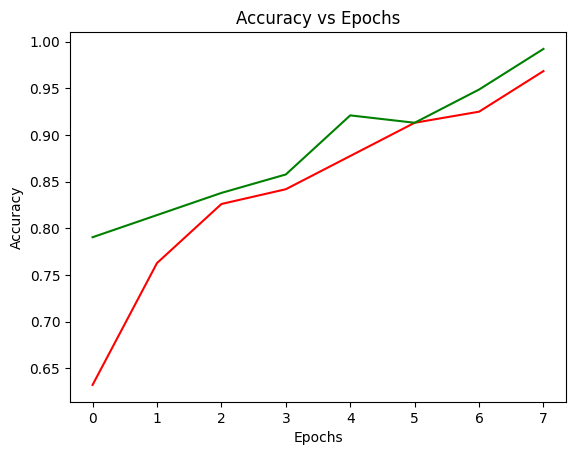

In [ ]:
plt.plot(history.epoch, history.history['accuracy'], color='red')
plt.plot(history.epoch, history.history['val_accuracy'], color='green')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

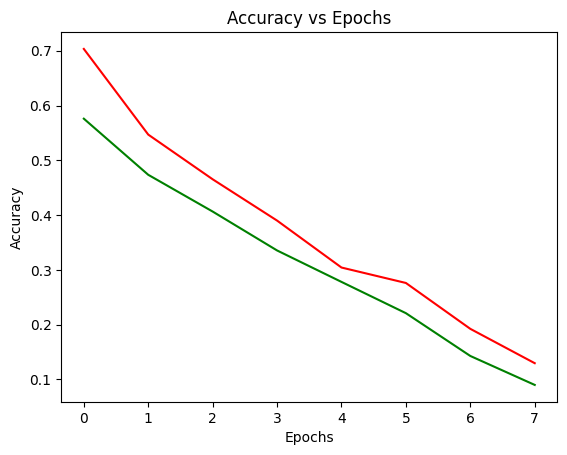

In [ ]:
plt.plot(history.epoch, history.history['loss'], color='red')
plt.plot(history.epoch, history.history['val_loss'], color='green')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


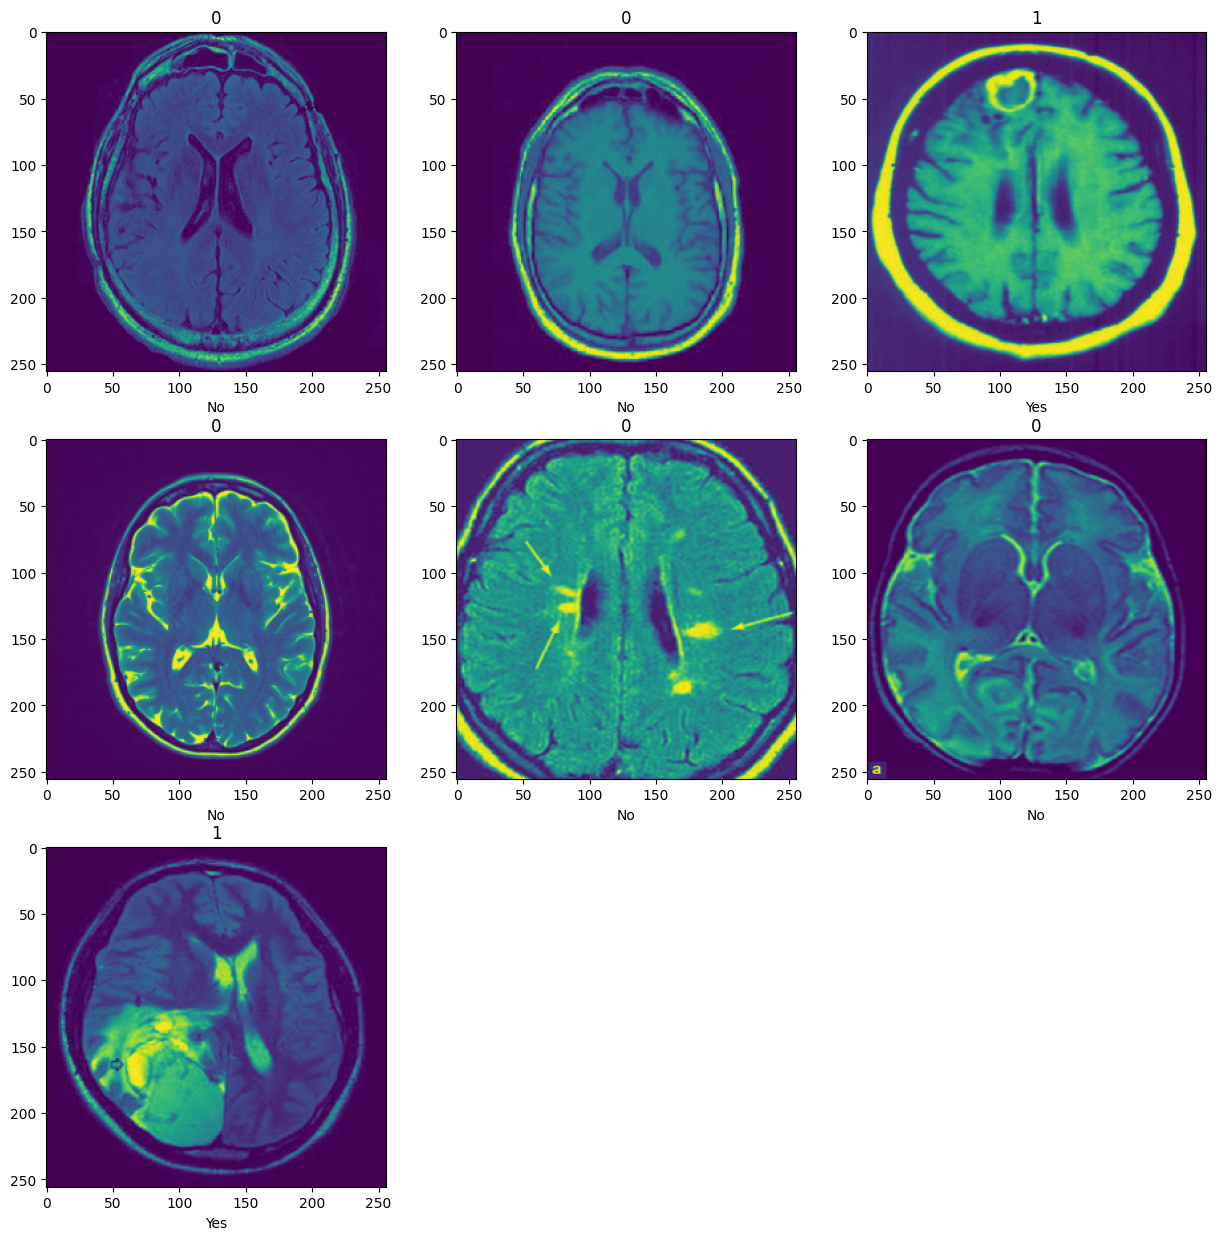

In [ ]:
for batch_img, batch_label in train_data.take(1):
    plt.figure(figsize=(15,15))
    for  i in range(7):
        data = batch_img[i].numpy()
        prediction = cnn.predict(data.reshape(-1,256,256,1))
        res = 'Yes' if prediction[0] > 0.5 else 'No'

        plt.subplot(3,3,i+1)
        plt.imshow(batch_img[i].numpy().astype)
        plt.title(batch_label[i].numpy())
        plt.xlabel(res)




8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


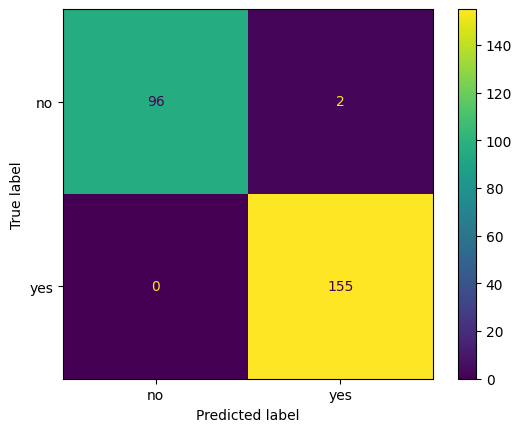

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get true labels from the test dataset
true_labels = np.concatenate([y for x, y in test_data], axis=0)

# Get predictions from the model
predictions = cnn.predict(test_data)

# Convert predictions to binary classes (0 or 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
disp.plot()
plt.show()